<a href="https://colab.research.google.com/github/sreelakshmikl/Brain_tumor/blob/main/DL_Brain_tumor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from skimage.transform import resize
from skimage.io import imread
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Flatten

In [ ]:
os.listdir('/content/drive/MyDrive/Brain_Tumor/Training')

['glioma', 'meningioma', 'pituitary', 'notumor']

In [ ]:
os.listdir('/content/drive/MyDrive/Brain_Tumor/Testing')

['glioma', 'pituitary', 'meningioma', 'notumor']

In [ ]:
datadir='/content/drive/MyDrive/Brain_Tumor/Training'

In [ ]:
X_train=[]
y_train=[]
Categories=['glioma', 'meningioma', 'pituitary', 'notumor']
for i in Categories:
  path=os.path.join(datadir,i)
  # print(path)
  images=os.listdir(path)
  # print(images)
  print(i,':',len(images))
  for img in images:
    img_path=os.path.join(path,img)
    # print(img_path)
    img_array=imread(img_path)
    img_resized=resize(img_array,(150,150,1))
    X_train.append(img_resized)
    y_train.append(Categories.index(i))
  print('loaded category',i)

glioma : 1307
loaded category glioma
meningioma : 1319
loaded category meningioma
pituitary : 1349
loaded category pituitary
notumor : 1574
loaded category notumor


In [ ]:
datadir='/content/drive/MyDrive/Brain_Tumor/Testing'
X_test=[]
y_test=[]
Categories_1=['glioma', 'pituitary', 'meningioma', 'notumor']
for j in Categories_1:
  path=os.path.join(datadir,j)
  images=os.listdir(path)
  print(j,':',len(images))
  for img in images:
    img_path=os.path.join(path,img)
    img_array=imread(img_path)
    img_resized=resize(img_array,(150,150,1))
    X_test.append(img_resized)
    y_test.append(Categories_1.index(j))
  print('loaded catrgory',j)

glioma : 300
loaded catrgory glioma
pituitary : 310
loaded catrgory pituitary
meningioma : 306
loaded catrgory meningioma
notumor : 405
loaded catrgory notumor


In [ ]:
import numpy as np
X_train=np.array(X_train)
y_train=np.array(y_train)
X_test=np.array(X_test)
y_test=np.array(y_test)

In [ ]:
X_train.shape

(5549, 150, 150, 1)

In [ ]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(150,150,1),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(32,3,activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(4,activation='softmax'))

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(X_train,y_train,batch_size=100,epochs=50)

Epoch 1/50
56/56 [==============================] - 5s 41ms/step - loss: 1.0439 - accuracy: 0.5426
Epoch 2/50
56/56 [==============================] - 2s 38ms/step - loss: 0.6221 - accuracy: 0.7565
Epoch 3/50
56/56 [==============================] - 2s 38ms/step - loss: 0.4485 - accuracy: 0.8411
Epoch 4/50
56/56 [==============================] - 2s 36ms/step - loss: 0.3701 - accuracy: 0.8690
Epoch 5/50
56/56 [==============================] - 2s 36ms/step - loss: 0.3141 - accuracy: 0.8908
Epoch 6/50
56/56 [==============================] - 2s 36ms/step - loss: 0.2704 - accuracy: 0.9079
Epoch 7/50
56/56 [==============================] - 2s 36ms/step - loss: 0.2334 - accuracy: 0.9184
Epoch 8/50
56/56 [==============================] - 2s 36ms/step - loss: 0.2250 - accuracy: 0.9225
Epoch 9/50
56/56 [==============================] - 2s 38ms/step - loss: 0.1818 - accuracy: 0.9396
Epoch 10/50
56/56 [==============================] - 2s 38ms/step - loss: 0.1267 - accuracy: 0.9596
Epoch 11/

In [ ]:
loss,acc=model.evaluate(X_test,y_test)
print('Loss:',loss)
print('Accuracy:',acc)

42/42 [==============================] - 1s 8ms/step - loss: 8.1295 - accuracy: 0.5132
Loss: 8.129522323608398
Accuracy: 0.513247549533844


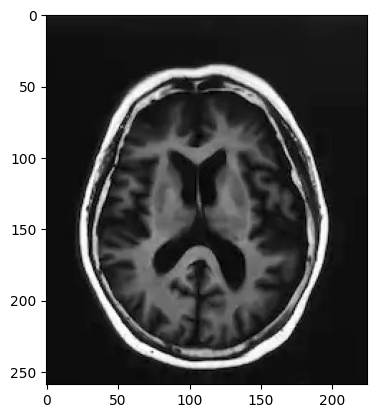

In [ ]:
img=imread('/content/drive/MyDrive/Brain_Tumor/Testing/notumor/Te-noTr_0003.jpg')
plt.imshow(img)

In [ ]:
img=resize(img,(150,150,1))
img_array=np.array(img)
img_array=img_array.reshape(1,150,150,1)

In [ ]:
pred=model.predict(img_array)
print(pred)

1/1 [==============================] - 0s 109ms/step
[[4.1360107e-13 8.8244422e-05 2.6021845e-16 9.9991179e-01]]


In [ ]:
ind=pred.argmax()
print(ind)

3


In [ ]:
print(Categories_1[ind])

notumor
